# Project: What factors may influence movie revenue and profit margin? (Investigating TMDb Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Movies are a major form of entertainment, and as such there is a lot of information gathered and stored relevant to them. One place this information is compiled is [The Movie Database](https://www.themoviedb.org/), which is where the dataset I'm analyzing comes from. The particular dataset contains records of around 10,000 movies from 1960 to 2015, and containing information like genre, budget, directors, cast, genre, revenue, etc. Using this information I intend to look at several factors that may influence revenue and profit margin of these movies. Specifically the questions I'll be looking at are the following:

1. Are there specific genres that have higher average revenues than others?
2. Do reviews (measured by average voter rating) appear to correlate with profit margin?
3. Do higher budgets correlate with higher profit margins?

We'll begin by importing the Python modules we'll be using to handle, review, and present the data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

<a id='wrangling'></a>
## Data Wrangling

Now that we've established what questions we will be looking at our next step is to bring in the data into this notebook, and prepare it for analysis.

### General Properties

First we'll import the csv file and store it as tmdb_df, as we're storing the TMdb data in a DataFrame format, and then we'll use the convert_dtypes function to convert the fields to appropriate data types. Finally we'll confirm the data was pulled in well by viewing the first five rows of data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Next we'll use the describe function to get a basic overview of the numeric fields to see if there is anything that stands out immediately as odd.

In [3]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Reviewing the two summaries of data we've looked at there are a few things that we'll need to clean up and organize in order to answer the questions we're going to be looking at:

1. Both Genres and Production Companies fields can have multiple values seperated by |, and so we'll need to split those values up for analysis.
2. Both Budget and Revenue have significant amount of records with a value of 0 as identified by the min and percentile results of the describe function, and so we'll need to filter these values out so they do not skew our data.

### Data Cleaning

To clean up the data we'll start by using a series of functions to create indivual lists of unique genres and producers.

In [4]:
genres_list = pd.Series(tmdb_df['genres'].str.cat(sep = '|').split('|')).unique()
producers_list = pd.Series(tmdb_df['production_companies'].str.cat(sep = '|').split('|')).unique()
print(genres_list, producers_list)

['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign'] ['Universal Studios' 'Amblin Entertainment' 'Legendary Pictures' ...
 'Douglas & Lewis Productions' 'Benedict Pictures Corp.' 'Norm-Iris']


Next, we'll create two filtered DataFames containing:
1. Only the records with an adjusted revenue
2. Only the records with both an adjusted revenue and an adjusted budget

We're creating two filtered DataFrames because one of our questions to investigate requires only a value for revenue, while the other two require the value for budget as well. We're also using the adjusted values for these items (revenue_adj and budget_adj) to keep the comparisons as fair as possible as these values are adjsuted to refect the amount in 2010 dollars.

In [5]:
movies_with_revenue_df = tmdb_df[(tmdb_df.revenue_adj > 0)]
movies_with_budget_revenue_df = tmdb_df[(tmdb_df.revenue_adj > 0) & (tmdb_df.budget_adj > 0)]
print('Min adjusted revenue for movies_with_revenue_df: ', movies_with_revenue_df['revenue_adj'].min(axis=0))
print('Min adjusted budget for movies_with_budget_revenue_df: ', movies_with_budget_revenue_df['budget_adj'].min(axis=0))

Min adjusted revenue for movies_with_revenue_df:  2.37070528956505
Min adjusted budget for movies_with_budget_revenue_df:  0.9693980425914721


<a id='eda'></a>
## Exploratory Data Analysis

Now that we've cleaned up our data we can start our exploration of it to see what we find in relation to our questions.

### Research Question 1 - Are there specific genres that have higher average revenues than others?

To investigate this question we'll first get the average adjusted revenue for all movies with recorded revenue.

In [6]:
average_revenue = int(movies_with_revenue_df.revenue_adj.mean())
average_revenues_by_genre = pd.Series([average_revenue], index=['Overall'])
print('Overall average adjusted revenue', average_revenue)

Overall average adjusted revenue 115077354


Next we'll use the previously created list of genres to break movies up based off of genre and calculate the average of each genre.

In [7]:
for genre in genres_list:
    average_revenue = int(movies_with_revenue_df[(movies_with_revenue_df.genres.str.contains(genre))].revenue_adj.mean())
    print(genre, 'average adjusted revenue', average_revenue)
    average_revenues_by_genre[genre] = average_revenue

Action average adjusted revenue 173475564
Adventure average adjusted revenue 247217390
Science Fiction average adjusted revenue 182108080
Thriller average adjusted revenue 112863522
Fantasy average adjusted revenue 221020569
Crime average adjusted revenue 99078380
Western average adjusted revenue 117026286
Drama average adjusted revenue 84565514
Family average adjusted revenue 210533899
Animation average adjusted revenue 251451614
Comedy average adjusted revenue 102582341
Mystery average adjusted revenue 100537389
Romance average adjusted revenue 94092107
War average adjusted revenue 137928834
History average adjusted revenue 104672071
Music average adjusted revenue 102342017
Horror average adjusted revenue 70273435
Documentary average adjusted revenue 11512445
TV Movie average adjusted revenue 58389103
Foreign average adjusted revenue 10820830


Now that we have the averages for each genre, along with the overall average, we'll plot them out to get a better view on how the values relate to each other.

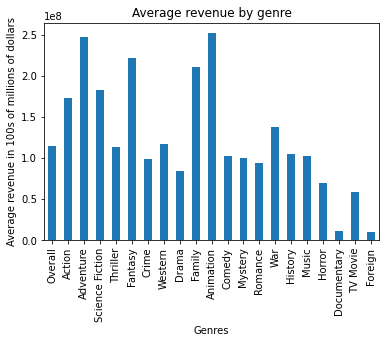

In [8]:
plt.title('Average revenue by genre')
plt.ylabel('Average revenue in 100s of millions of dollars')
plt.xlabel('Genres')
average_revenues_by_genre.plot.bar()

From the plot of the averages there are two genres that a very close to each other as the top average, Adventure and Animation, and a couple other genres that cross the $200 million average, Fantasy and Family, and the remaining trail significantly. To determine which genre has the highest average we can look at a sorted version of the list of values.

In [9]:
print(average_revenues_by_genre.sort_values(axis=0, ascending=False, inplace=False))

Animation          251451614
Adventure          247217390
Fantasy            221020569
Family             210533899
Science Fiction    182108080
Action             173475564
War                137928834
Western            117026286
Overall            115077354
Thriller           112863522
History            104672071
Comedy             102582341
Music              102342017
Mystery            100537389
Crime               99078380
Romance             94092107
Drama               84565514
Horror              70273435
TV Movie            58389103
Documentary         11512445
Foreign             10820830
dtype: int64


This shows us that Animation is the genre with the highest average. Based off of this data there does appear to be a correlation between genre and average revenue.

### Research Question 2  - Do reviews (measured by average voter rating) appear to correlate with profit margin?

To investigate this we'll first create a function to calculate the profit margin as a percentage. We'll then use the function to create a new column on the DataFrame.

In [10]:
def profit_margin (budget, revenue):
    prof_marg = 100*((revenue-budget)/revenue)
    return prof_marg

movies_with_budget_revenue_df['profit_margin'] = profit_margin(movies_with_budget_revenue_df.loc[:, 'budget_adj'], movies_with_budget_revenue_df.loc[:, 'revenue_adj'])

Now that we have the needed data calculated out we'll create a scatter plot to view the results. However this results in a rather unreadable plot due to some significantly unprofitable movies.

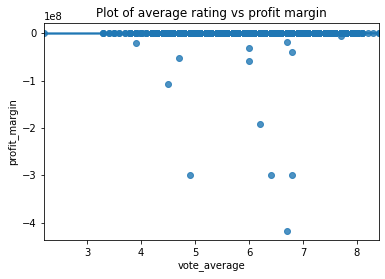

In [11]:
plt.title('Plot of average rating vs profit margin')
sns.regplot(x="vote_average", y="profit_margin", data=movies_with_budget_revenue_df)

If we narrow our focus to only profitable movies, those with a profit margin greater than 0, we do see a more readable plot that has a noticeable trend to it.

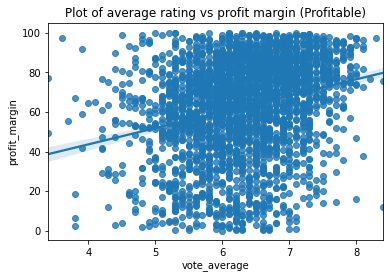

In [12]:
plt.title('Plot of average rating vs profit margin (Profitable)')
sns.regplot(x="vote_average", y="profit_margin", data=movies_with_budget_revenue_df[(movies_with_budget_revenue_df.profit_margin > 0)])

If we do the same and focus only on unprofitable movies, those with a profit margin less than 0, we see that the plot is approximately the same as when all the data was plotted.

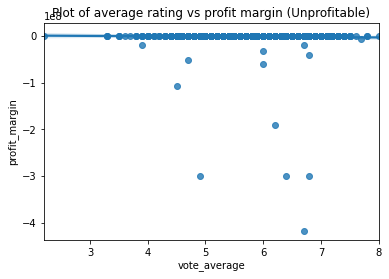

In [13]:
plt.title('Plot of average rating vs profit margin (Unprofitable)')
sns.regplot(x="vote_average", y="profit_margin", data=movies_with_budget_revenue_df[(movies_with_budget_revenue_df.profit_margin < 0)])

### Research Question 3  - Do higher budgets correlate with higher profit margins?

From our last question we found that there are some significant outliers when it comes to profit margin that make plots mostly unreadable, but in this interest of being thorough we'll double check that checking the adjust profit against the profit margin is similarly impacted.

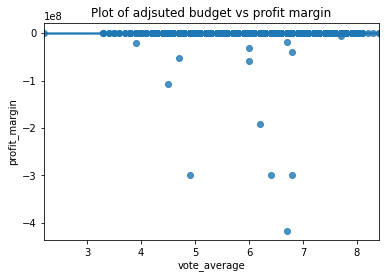

In [14]:
plt.title('Plot of adjsuted budget vs profit margin')
sns.regplot(x="vote_average", y="profit_margin", data=movies_with_budget_revenue_df)

Seeing that the outliers are having a significant impact we'll once again focus on just those movies that made a profit, which is having a profit margin greater than 0.

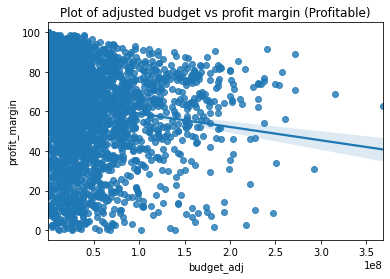

In [15]:
plt.title('Plot of adjusted budget vs profit margin (Profitable)')
sns.regplot(x="budget_adj", y="profit_margin", data=movies_with_budget_revenue_df[(movies_with_budget_revenue_df.profit_margin > 0)])

<a id='conclusions'></a>
## Conclusions

In conlcusion, we have the following review and reflections on the data:

### Are there specific genres that have higher average revenues than others?

There are genres that have a higher average adjusted profit than others. We do not know if this higher adjusted profit is related to these specific genres, or if there is some other reason for this trend such as the amount of timing of when certain genres were made.

Additionally, the amount of data provided in this data set is not large enough to provide good answers for specific genres. For example there are only 31 movies in the foreign genre that include a revenue value. Doing some additional external research shows that these movies do not contain many highly rated foreign movies with gross revenues higher than our returned average as seen [here](https://www.imdb.com/list/ls056881942/).

### Do reviews (measured by average voter rating) appear to correlate with profit margin?

When only considering profitable movies there does appear to be some correlation between rating and profit margin, but this does not mean that the higher ratings cause the increase in profit margin. This is due not only to us focusing on only the profitable movies, but also because the number of votes that were plased to get the average rating can vary greatly between movies and also some movies have a very small sample size of votes.

A larger scope of data would help provide a more accurate results in this case. While we do have a significant amount of data do draw from there is a high probability of a skew to the rating as all the results are coming from just one website's data. Compiling reviews and scores from multiple sourse would give a better perspective on the overall critical view on the movies to compare against the profit margin.

### Do higher budgets correlate with higher profit margins?

When only considering profitable movies there appears to be a small negative correlation between budget and profit margin, but again this does not mean that higher profit margins are cause by lower budget movies. There are most likely other factors that could be contributing or causing this trend, such as the increase of movie budgets over time.

Like the previous question there is a significant amount of data provided to answer this question, but in this instance the data is adequate for a good judgement with further analysis. Budget and revenues are set values that would not vary depending on what source you pulled from.